### Preparation

In [11]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA

from utils import *

In [2]:
data = np.loadtxt("data/data.txt")
labels = np.loadtxt("data/labels.txt")

In [5]:
classes = np.unique(labels)

## Direct KMeans

In [8]:
kmeans = KMeans(n_clusters=len(classes)*5, random_state=0, n_jobs=-1, verbose=1).fit(data)
kmeans.cluster_centers_

array([[2.63097040e-02, 8.78105234e-03, 1.75247583e-01, ...,
        3.71807367e-03, 9.05914146e-03, 2.05107056e-03],
       [3.83861705e-02, 8.92242413e-03, 9.72204244e-02, ...,
        3.22130769e-01, 9.15571323e-03, 5.61602301e-04],
       [5.43958109e-02, 1.25551704e-02, 1.07239833e-01, ...,
        7.25806060e-03, 9.04895151e-03, 2.66134071e-01],
       ...,
       [1.45079263e-02, 2.20879498e-02, 2.56435974e-01, ...,
        2.38740058e-04, 8.66695110e-03, 1.47603090e-03],
       [3.11199689e-02, 8.46233741e-03, 1.95742990e-01, ...,
        8.39984852e-04, 9.06062095e-03, 2.24847629e-03],
       [2.15272410e-02, 9.46658773e-03, 2.19278123e-01, ...,
        9.19707321e-04, 8.73176487e-03, 2.38742836e-03]])

In [9]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)
centers = pca.transform(kmeans.cluster_centers_)
data_pca.shape, centers.shape

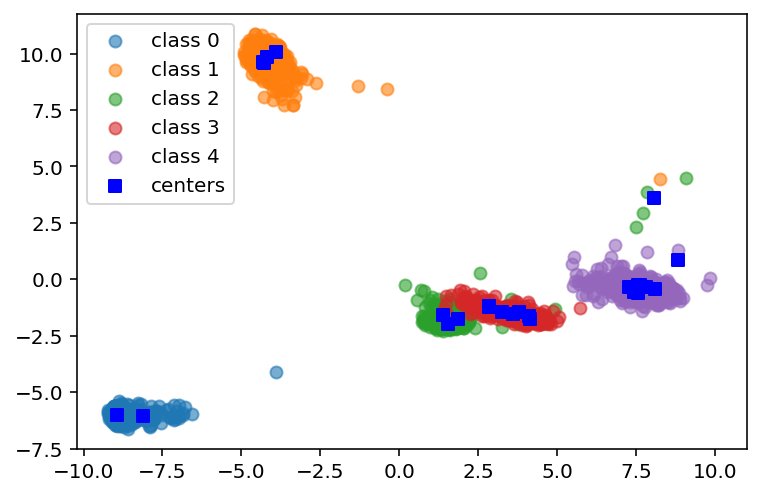

In [44]:
%config InlineBackend.figure_format = 'retina'
for label in classes:
    mask = (labels == label)
    plt.scatter(data_pca[mask, 0], data_pca[mask, 1], alpha=0.6, label="class " + str(int(label)))
plt.scatter(centers[:, 0], centers[:, 1], marker='s', label='centers', c='b')
plt.legend()

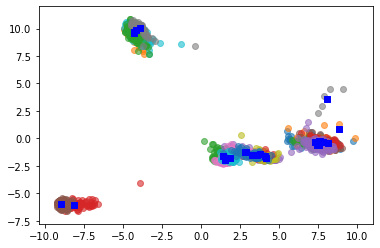

In [43]:
%config InlineBackend.figure_format = 'png'
for label in np.unique(kmeans.labels_):
    mask = (kmeans.labels_ == label)
    plt.scatter(data_pca[mask, 0], data_pca[mask, 1], alpha=0.6, label="cluster " + str(int(label)))
plt.scatter(centers[:, 0], centers[:, 1], marker='s', label='centers', c='b')
# plt.legend()

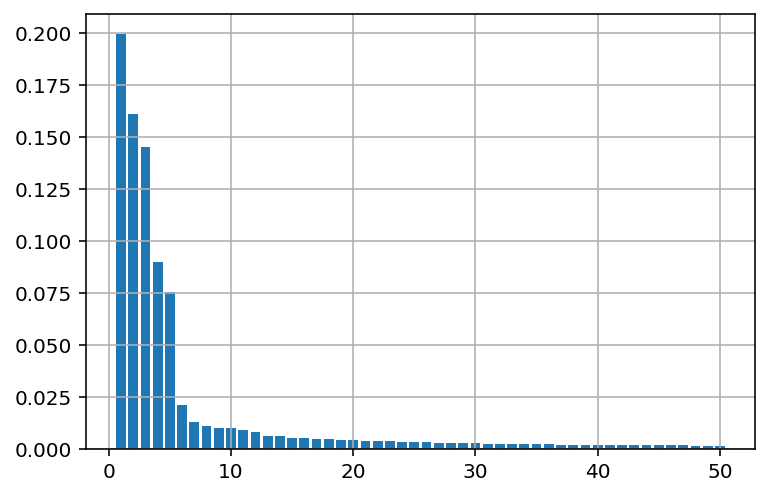

In [41]:
%config InlineBackend.figure_format = 'retina'
pca = PCA(n_components=50)
pca.fit(data)
plt.bar(range(1, 51), pca.explained_variance_ratio_)
plt.grid()